<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [17]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
%matplotlib inline 

import seaborn as sns

### 1. Import the data

In [4]:
csv_file = 'ais.csv'
ais = pd.read_csv('/home/gaio/Documents/GitHub/iod-linux/DATA/ais.csv', index_col=0)

### 2. Do some EDA of relationships between features.

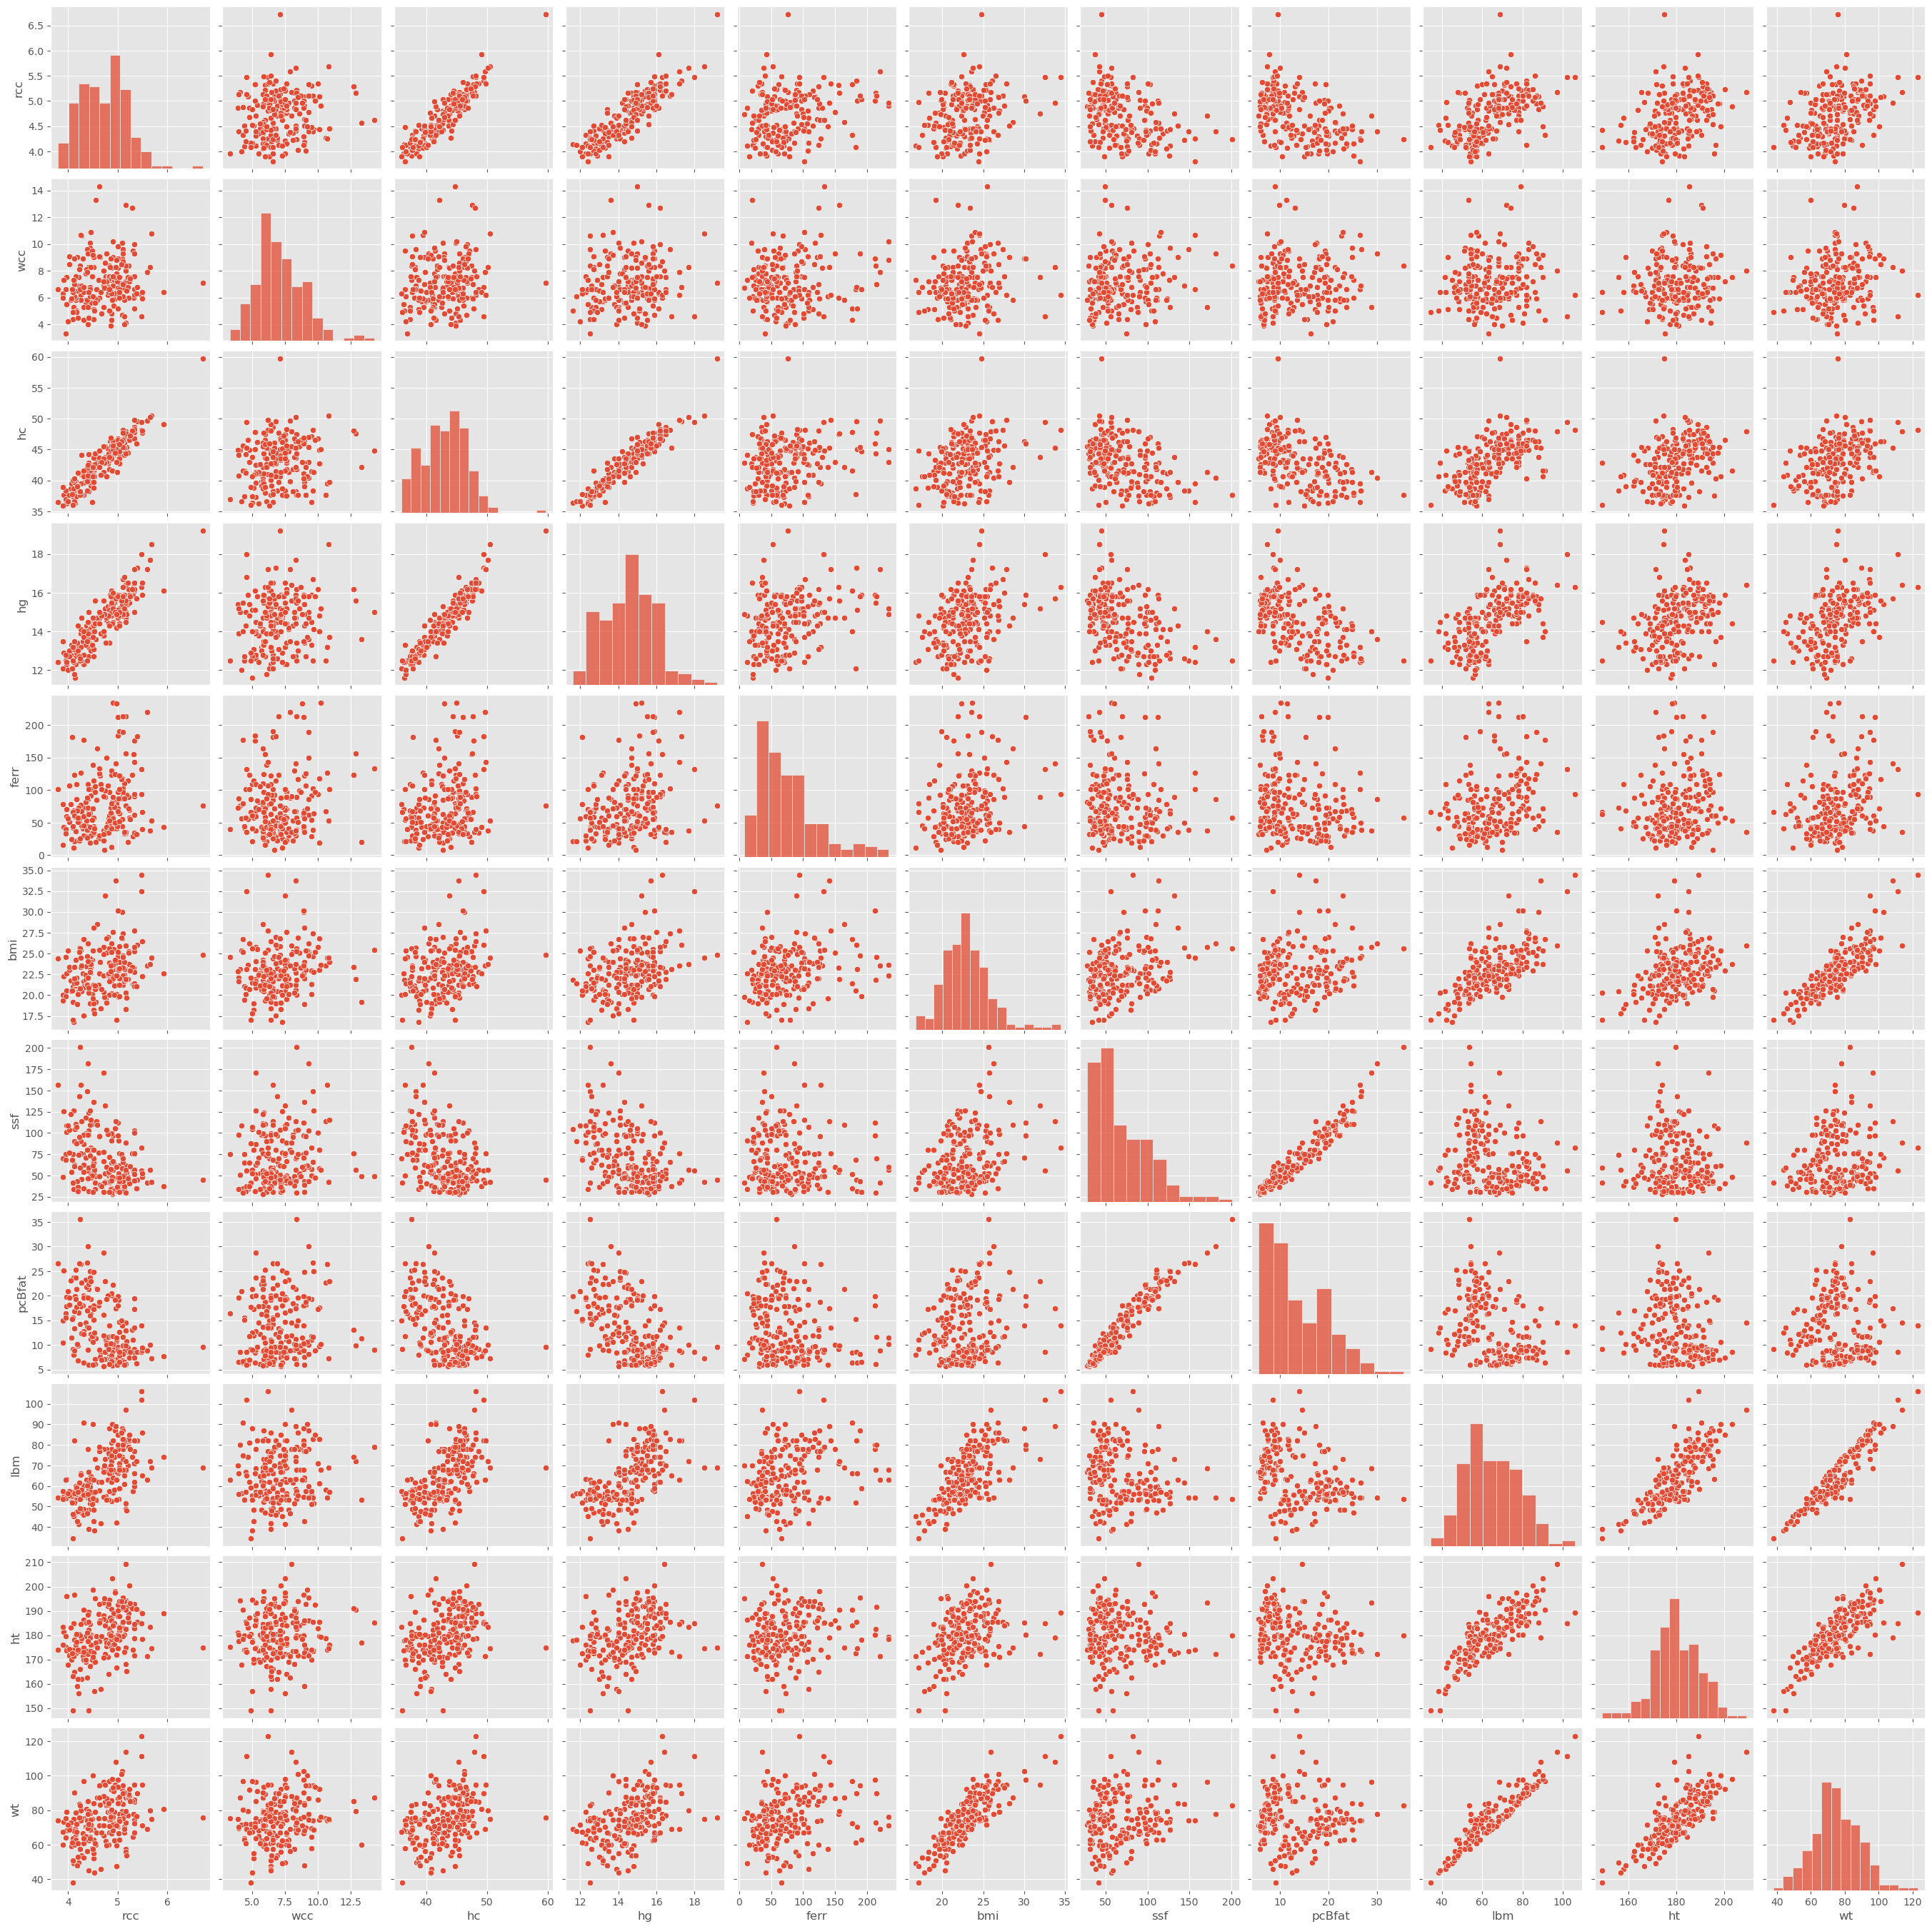

In [5]:
sns.pairplot(ais)

In [6]:
ais.isnull().sum()


rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

In [8]:
## Check data
X = ais
 
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*80))
print(X.describe().T)
print('')
print('Sample of X%s' % ('_'*80))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 202 rows and 13 columns
Basic Statistics about X________________________________________________________________________________
        count        mean        std     min       25%      50%      75%  \
rcc     202.0    4.718614   0.457976    3.80    4.3725    4.755    5.030   
wcc     202.0    7.108911   1.800337    3.30    5.9000    6.850    8.275   
hc      202.0   43.091584   3.662989   35.90   40.6000   43.500   45.575   
hg      202.0   14.566337   1.362451   11.60   13.5000   14.700   15.575   
ferr    202.0   76.876238  47.501239    8.00   41.2500   65.500   97.000   
bmi     202.0   22.955891   2.863933   16.75   21.0825   22.720   24.465   
ssf     202.0   69.021782  32.565333   28.00   43.8500   58.600   90.350   
pcBfat  202.0   13.507426   6.189826    5.63    8.5450   11.650   18.080   
lbm     202.0   64.873713  13.070197   34.36   54.6675   63.035   74.750   
ht      202.0  180.103960   9.734494  148.90  174.0000  179.

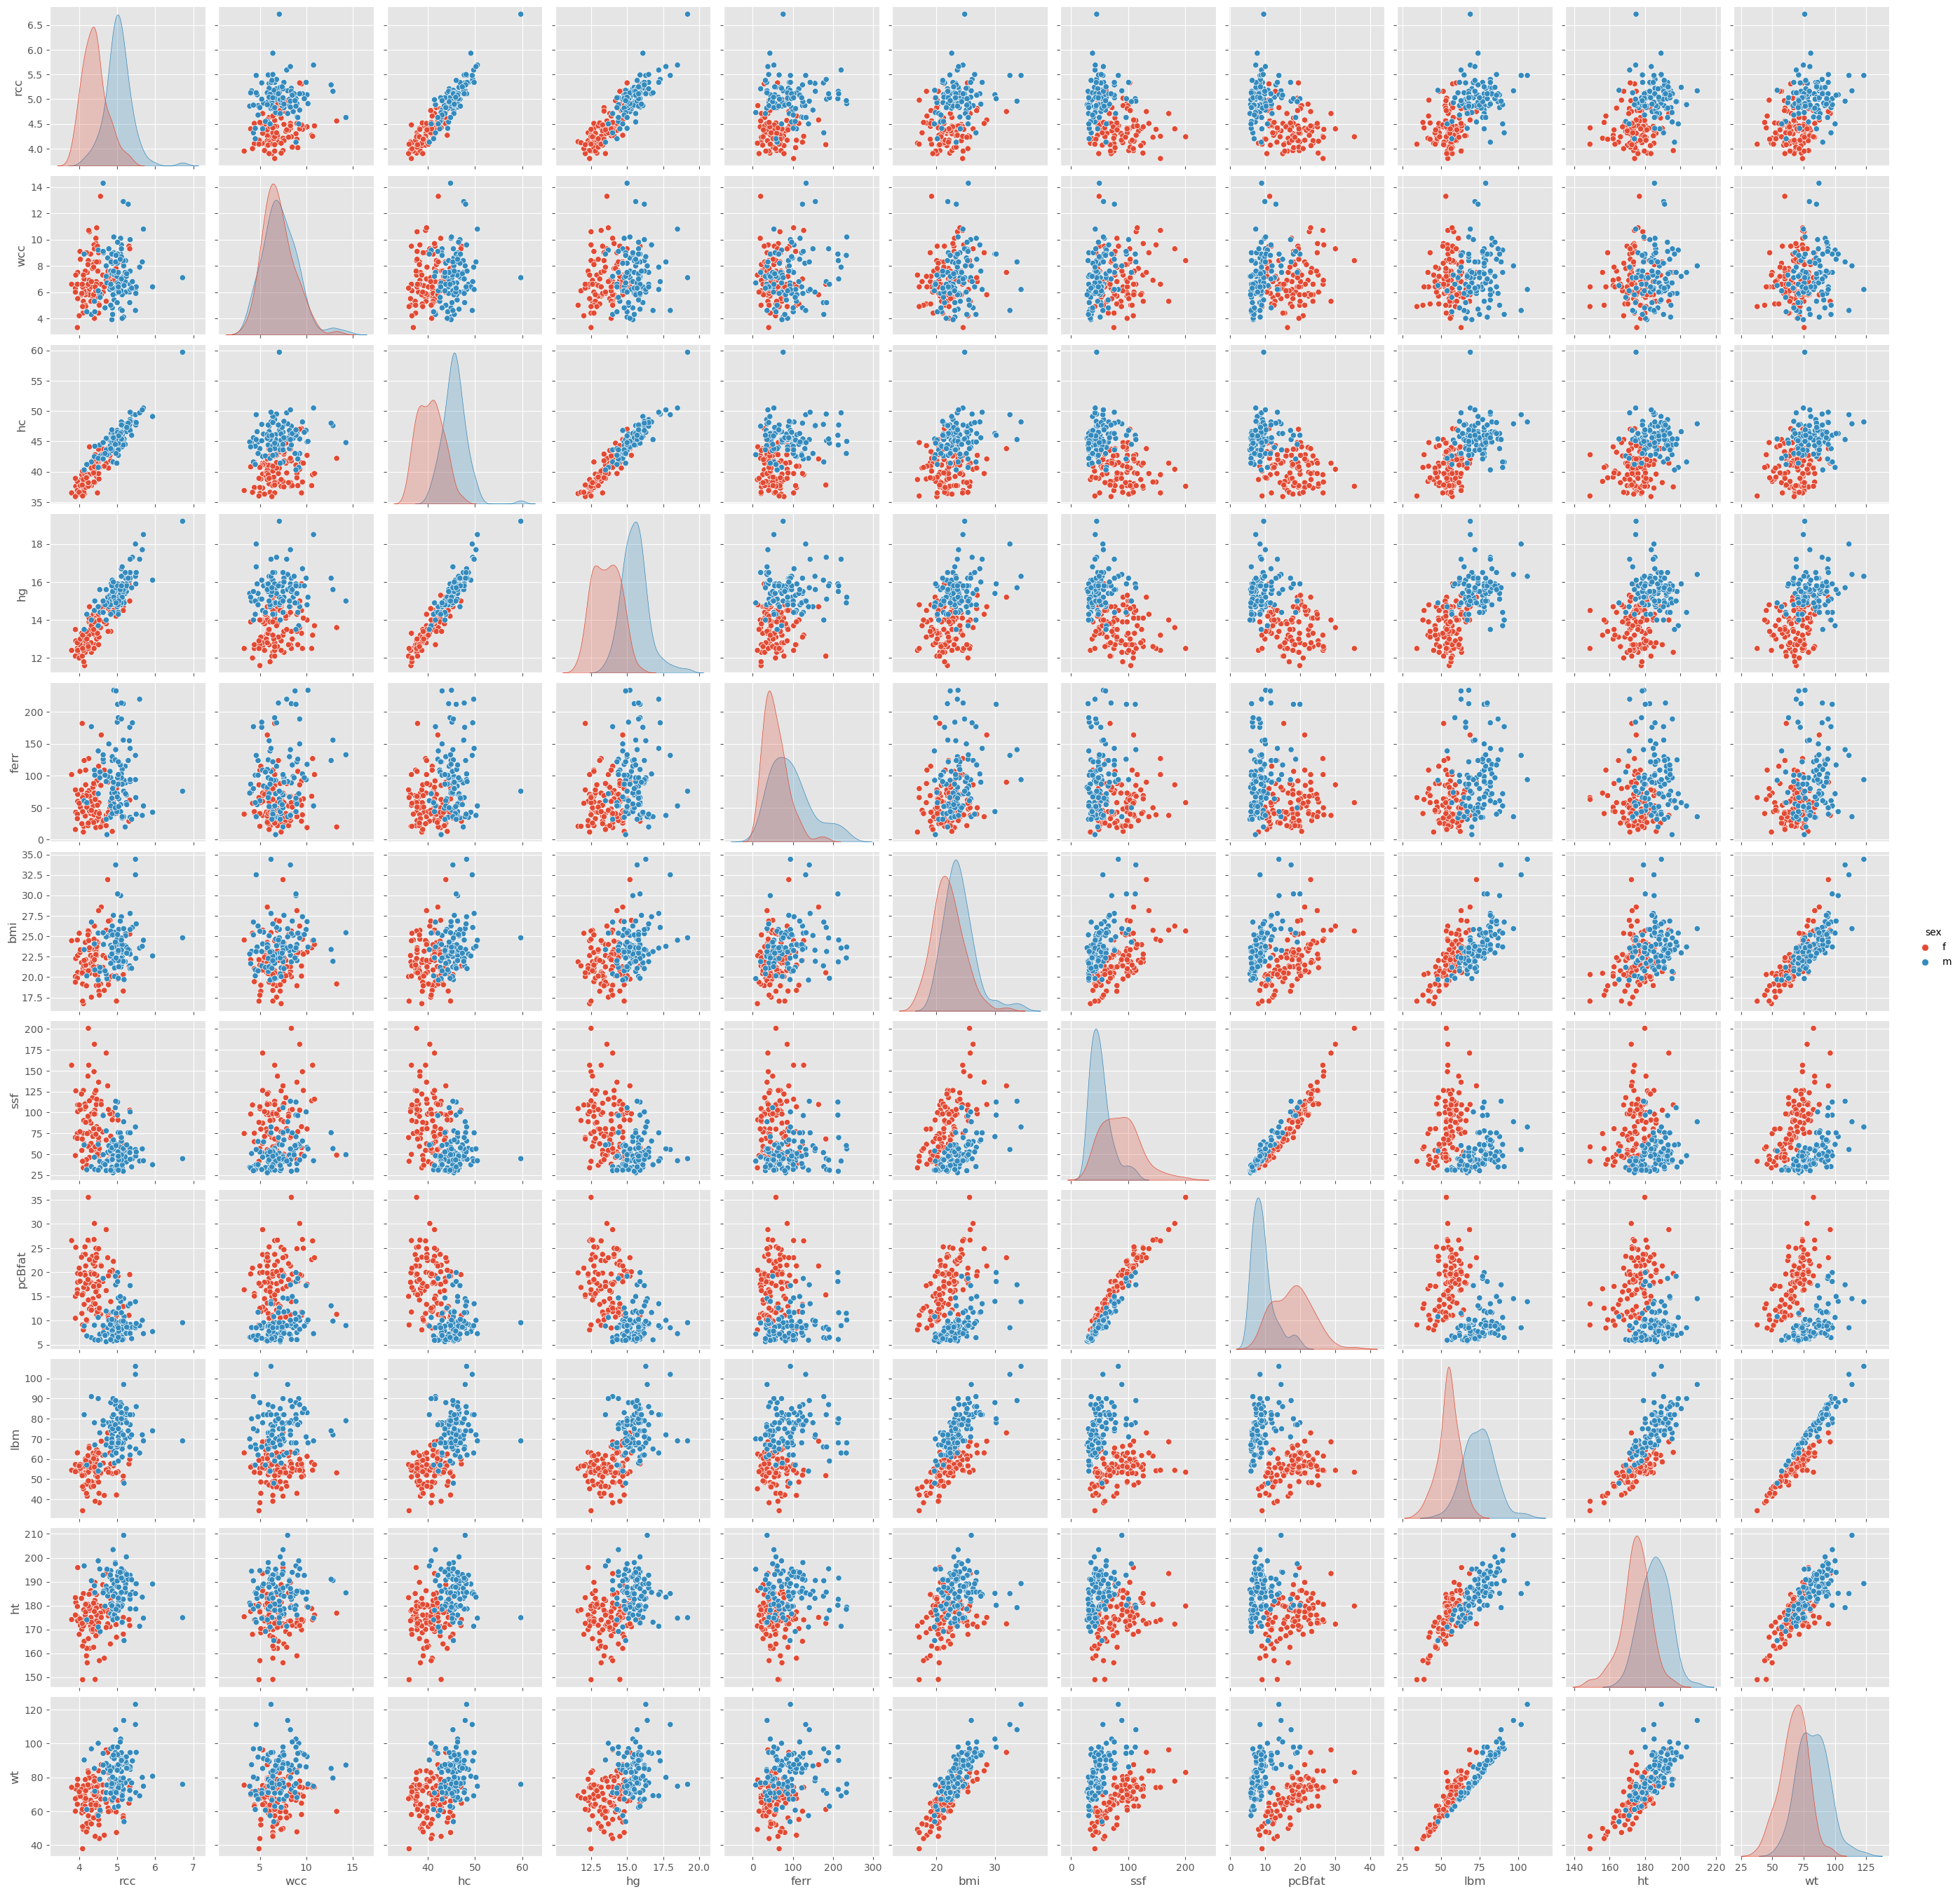

In [9]:
sns.pairplot(data=ais, hue='sex');


### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [16]:
X = ais.drop(['sex', 'sport'], axis = 1)
# X = ais[['ht', 'wt']]
# y = seeds.sex
scaler = StandardScaler()
Xss = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [18]:
# ANSWER
k = 2 
k_mean2 = KMeans(n_clusters= k)
k_mean2.fit(Xss)

KMeans(n_clusters=2)

### 5. Get the labels for the models

In [19]:
# ANSWER
labels_2 = k_mean2.labels_
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [20]:
# ANSWER
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

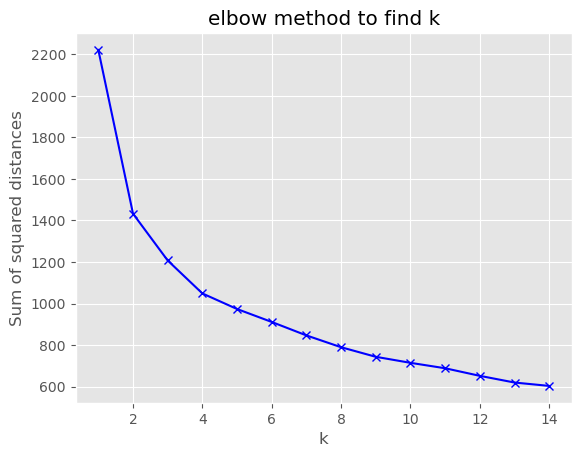

In [23]:
# ANSWER
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('elbow method to find k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

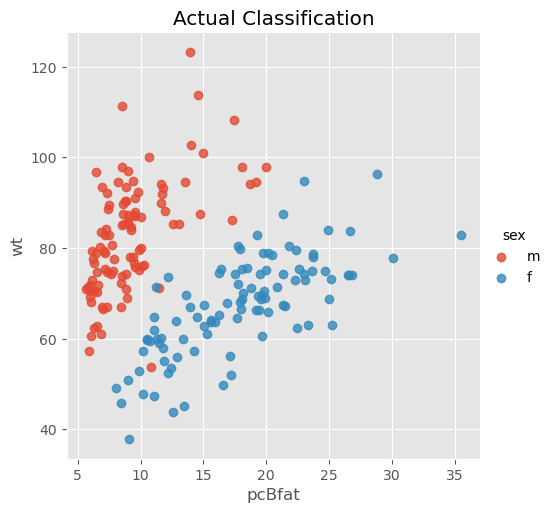

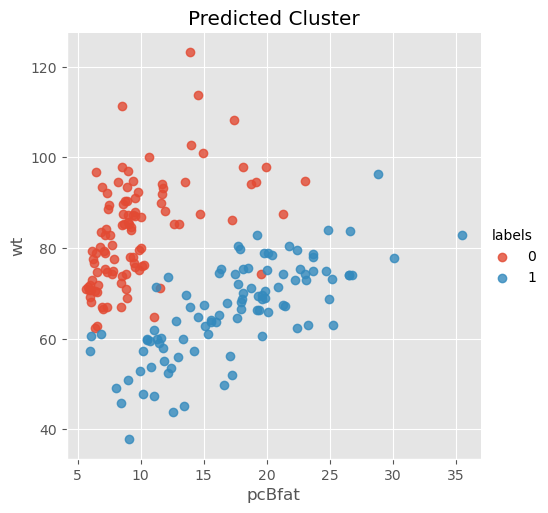

In [24]:
# ANSWER
#length x groove_length
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



